In [18]:
# Based on https://www.pyimagesearch.com/2016/09/26/a-simple-neural-network-with-python-and-keras/

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def show(cv_image):
    img = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20,10))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()
    
def showGrey(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import argparse
import cv2
import os

Using TensorFlow backend.


Left:


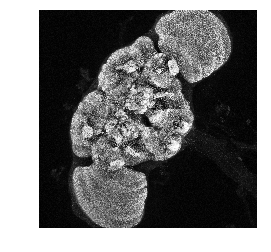

Right:


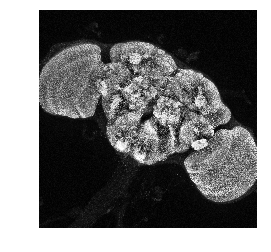

Left:


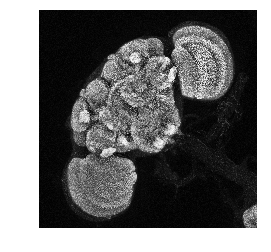

Right:


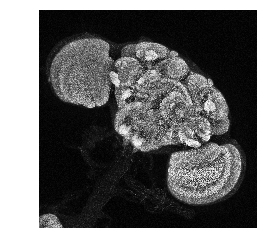

Left:


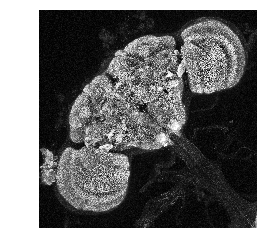

Right:


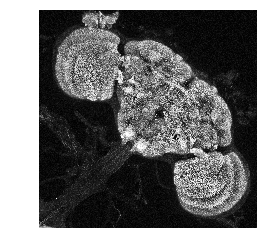

Left:


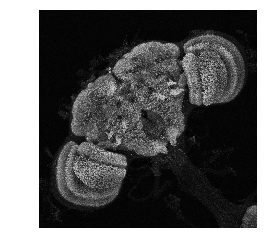

Right:


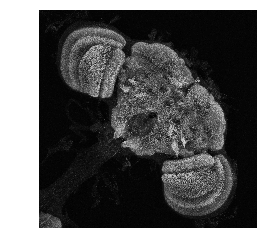

Left:


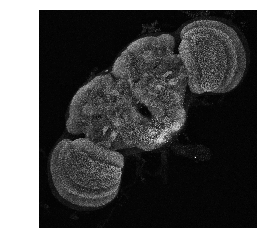

Right:


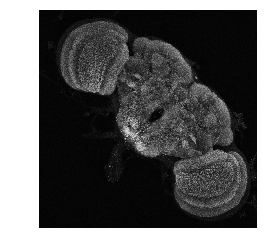

Left:


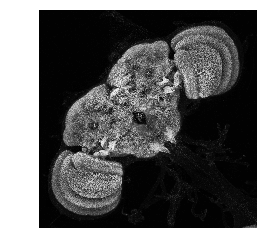

Right:


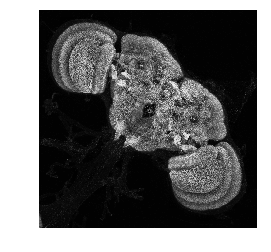

Left:


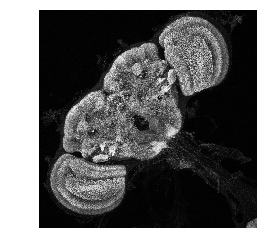

Right:


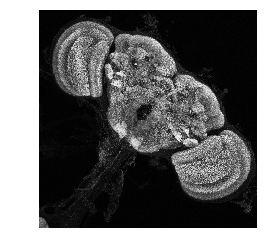

Left:


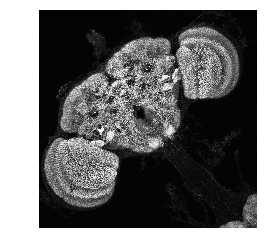

Right:


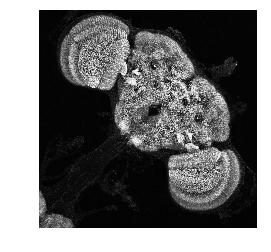

Left:


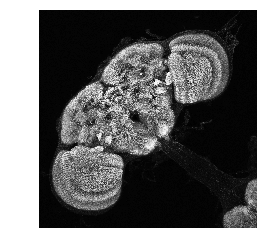

Right:


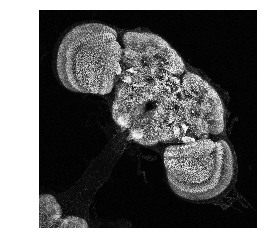

Left:


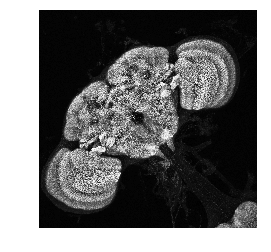

Right:


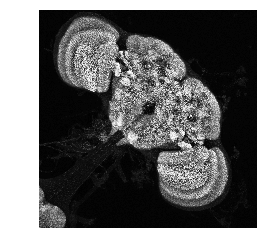

Loaded 1392 images


In [5]:
# load data set

def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten()

def rotate(image, angle=90):
    rows = image.shape[0]
    cols = image.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    return cv2.warpAffine(image,M,(cols,rows))
    
dataset_dir = "/Users/rokickik/Downloads/Workstation/orientation/20x/left"
imagePaths = list(paths.list_images(dataset_dir))

data = []
raw_labels = []
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    data.append(image_to_feature_vector(image))
    raw_labels.append("left")

    right = rotate(image, angle=-90)
    data.append(image_to_feature_vector(image))
    raw_labels.append("right")
        
    if i<10:
        print("Left:")
        showGrey(image)
        print("Right:")
        showGrey(right)
        
print("Loaded %d images" % len(raw_labels))

In [6]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(raw_labels)

# scale the input image pixels to the range [0, 1], then transform
# the labels into vectors in the range [0, num_classes] -- this
# generates a vector for each label where the index of the label
# is set to `1` and all other entries to `0`
data = np.array(data) / 255.0
labels = np_utils.to_categorical(labels, 2)
 
# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(
    data, labels, test_size=0.25, random_state=42)
    

In [7]:
# define the architecture of the network
model = Sequential()
model.add(Dense(768, input_dim=32*32*1, activation="relu", kernel_initializer="uniform"))
model.add(Dense(384, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2))
model.add(Activation("softmax"))


In [8]:
# train the model using SGD
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.fit(trainData, trainLabels, epochs=50, batch_size=128, verbose=1)


Epoch 1/50
1044/1044 [==============================] - 0s 279us/step - loss: 0.6945 - acc: 0.5048
Epoch 2/50
1044/1044 [==============================] - 0s 101us/step - loss: 0.6944 - acc: 0.5048
Epoch 3/50
1044/1044 [==============================] - 0s 99us/step - loss: 0.6938 - acc: 0.4990
Epoch 4/50
1044/1044 [==============================] - 0s 101us/step - loss: 0.6936 - acc: 0.5086
Epoch 5/50
1044/1044 [==============================] - 0s 103us/step - loss: 0.6931 - acc: 0.5067
Epoch 6/50
1044/1044 [==============================] - 0s 109us/step - loss: 0.6928 - acc: 0.5057
Epoch 7/50
1044/1044 [==============================] - 0s 110us/step - loss: 0.6928 - acc: 0.5086
Epoch 8/50
1044/1044 [==============================] - 0s 105us/step - loss: 0.6944 - acc: 0.5029
Epoch 9/50
1044/1044 [==============================] - 0s 112us/step - loss: 0.6927 - acc: 0.5230
Epoch 10/50
1044/1044 [==============================] - 0s 107us/step - loss: 0.6920 - acc: 0.5201
Epoch 11/5

In [9]:
# show the accuracy on the testing set

model_filepath = "/Users/rokickik/Downloads/Workstation/orientation/model"
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))
model.save(model_filepath)


348/348 [==============================] - 0s 116us/step
[INFO] loss=0.7236, accuracy: 32.7586%


loading model
Classifying JRC_IS04526-20150904_41_C3.png


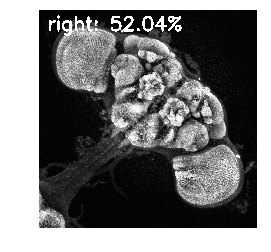

Classifying JRC_IS04527-20150904_41_C2.png


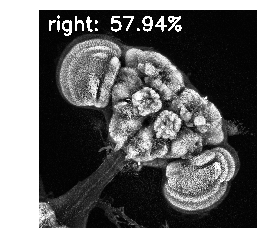

Classifying JRC_IS05101-20150904_44_C1.png


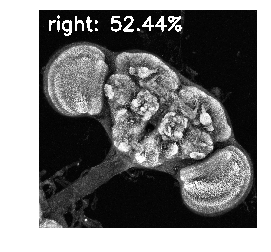

Classifying JRC_IS05110-20150904_44_B3.png


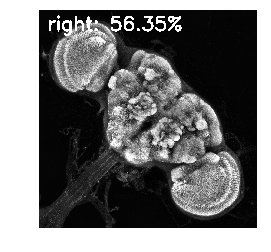

Classifying JRC_IS05113-20150904_44_H1.png


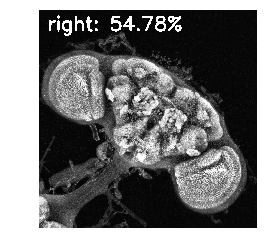

Classifying JRC_IS05117-20150904_44_H5.png


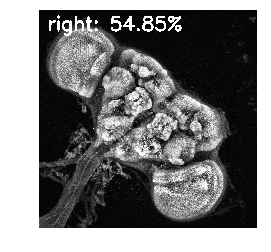

Classifying JRC_IS05123-20150904_44_H4.png


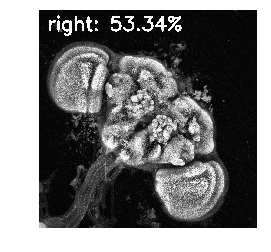

Classifying JRC_IS05128-20150904_44_C3.png


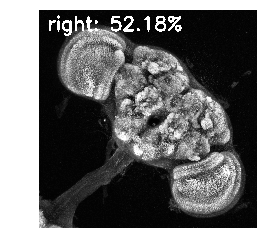

Classifying JRC_SS16571-20180411_35_A2.png


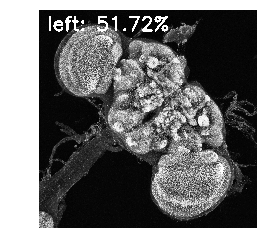

Classifying JRC_SS16571-20180411_35_A3.png


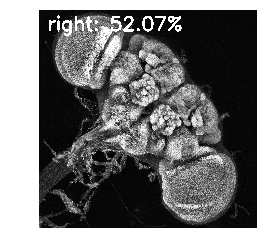

Classifying JRC_SS16571-20180411_35_A6.png


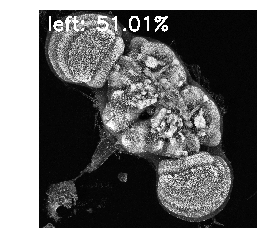

Classifying JRC_SS16571-20180411_35_B2.png


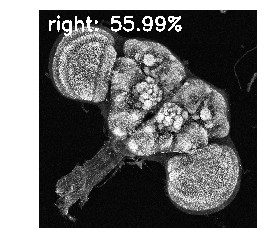

Classifying JRC_SS16571-20180411_35_B5.png


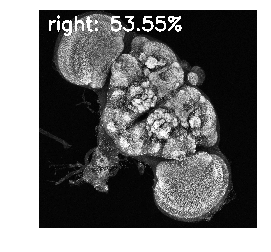

Classifying JRC_SS16571-20180411_35_B6.png


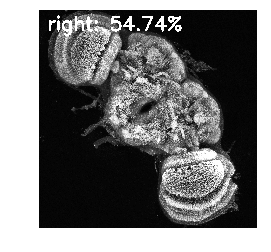

In [10]:
from keras.models import load_model

test_dir = "/Users/rokickik/Downloads/Workstation/orientation/20x/right"

# initialize the class labels 
CLASSES = ["left", "right"]
 
# load the network
print("loading model")
model = load_model(model_filepath)

# loop over our testing images
for imagePath in paths.list_images(test_dir):
    # load the image, resize it to a fixed 32 x 32 pixels (ignoring
    # aspect ratio), and then extract features from it
    print("Classifying {}".format(imagePath[imagePath.rfind("/") + 1:]))
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features = image_to_feature_vector(image) / 255.0
    features = np.array([features])
    
    # classify the image using our extracted features and pre-trained neural network
    probs = model.predict(features)[0]
    prediction = probs.argmax(axis=0)
 
    # draw the class and probability on the test image and display it
    label = "{}: {:.2f}%".format(CLASSES[prediction], probs[prediction] * 100)
    cv2.putText(image, label, (40, 95), cv2.FONT_HERSHEY_SIMPLEX, 3.0, (255, 255, 255), 10)
    showGrey(image)
